In [1]:
import math
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import pandas as pd
import numpy as np
import keras

In [2]:
from keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)
from google.colab.patches import cv2_imshow

11490434/11490434 [==============================] - 0s 0us/step


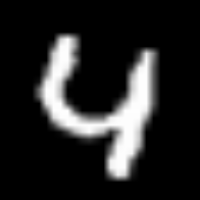

In [3]:
def zoom(image):
  return cv2.resize(image,(200, 200))
idx=np.random.randint(0,60000)
image=x_train[idx]
z_image=zoom(image)
cv2_imshow(z_image)

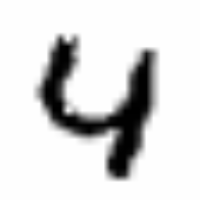

In [4]:
def greyscale(image):
  og_shape = image.shape
  flat_img = image.flatten()
  L=flat_img.max()
  new_img=[]
  for pixel in flat_img:
    new_img.append(L-1-pixel)
  return np.array(new_img).reshape(og_shape).astype(np.uint8)

grey_image=greyscale(image)
zoom_gimg=zoom(grey_image)
cv2_imshow(zoom_gimg)

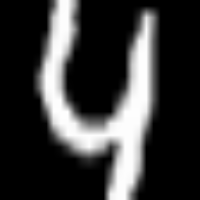

In [5]:
def image_crop(image, x, y, h, w):
  return image[x:x+w][y:y+h]

cropped_image=image_crop(image,3,3,20,20)
zoom_cimage=zoom(cropped_image)
cv2_imshow(zoom_cimage)

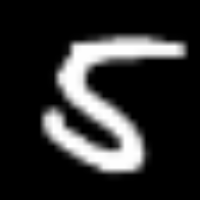

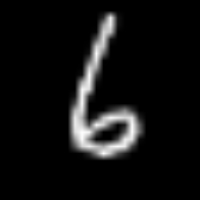

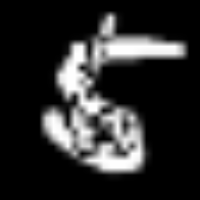

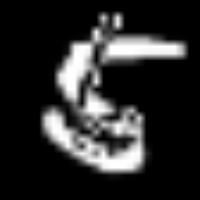

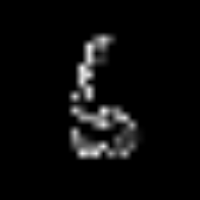

<ipython-input-6-74f12f4b92e1>:8: RuntimeWarning: divide by zero encountered in divide
  return image1/image2
<ipython-input-6-74f12f4b92e1>:8: RuntimeWarning: invalid value encountered in divide
  return image1/image2
/usr/local/lib/python3.10/dist-packages/google/colab/patches/__init__.py:18: RuntimeWarning: invalid value encountered in cast
  a = a.clip(0, 255).astype('uint8')


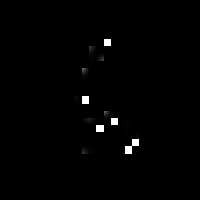

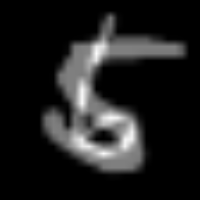

In [6]:
def add(image1, image2):
  return image1+image2
def sub(image1, image2):
  return image1-image2
def mult(image1, image2):
  return image1*image2
def div(image1, image2):
  return image1/image2
def blend(image1, image2, alpha):
  return (alpha*image1+(1-alpha)*image2)

idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]

cv2_imshow(zoom(image1))
cv2_imshow(zoom(image2))
cv2_imshow(zoom(add(image1,image2)))
cv2_imshow(zoom(sub(image1,image2)))
cv2_imshow(zoom(mult(image1,image2)))
cv2_imshow(zoom(div(image1,image2)))
cv2_imshow(zoom(blend(image1,image2,0.5)))

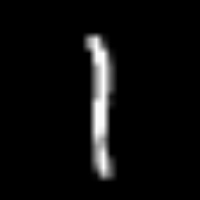

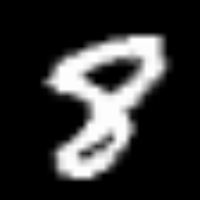

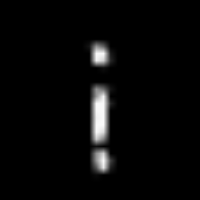

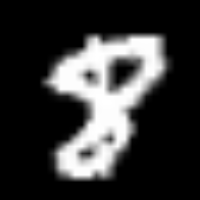

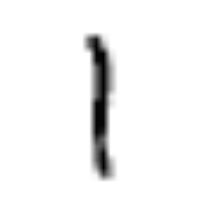

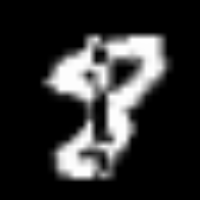

In [7]:
def Aand(image1, image2):
  return np.bitwise_and(image1, image2)
def Aor(image1, image2):
  return np.bitwise_or(image1, image2)
def Anot(image1):
  return np.bitwise_not(image1)
def Axor(image1, image2):
  return np.bitwise_xor(image1, image2)

idx=np.random.randint(0,60000,2)
image1=x_train[idx[0]]
image2=x_train[idx[1]]
cv2_imshow(zoom(image1))
cv2_imshow(zoom(image2))
cv2_imshow(zoom(Aand(image1,image2)))
cv2_imshow(zoom(Aor(image1,image2)))
cv2_imshow(zoom(Anot(image1)))
cv2_imshow(zoom(Axor(image1,image2)))


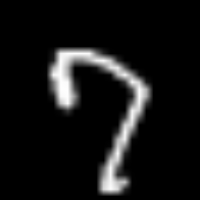

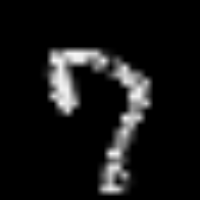

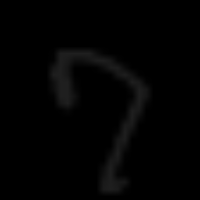

In [8]:
def bls(image,n):
  return np.left_shift(image,n)
def brs(image,n):
  return np.right_shift(image,n)

#if yeh allow nahi kiya toh iterate through each element and do pixel_value<<n for left shift and >>n for right shift
idx=np.random.randint(0,60000)
image=x_train[idx]
cv2_imshow(zoom(image))
cv2_imshow(zoom(bls(image,3)))
cv2_imshow(zoom(brs(image,3)))